In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

## 1. Загрузка и анализ данных

### 1.1. DataFrame ga_hits

In [3]:
df1 = pd.read_csv('data/ga_hits.csv')
print(df1.shape)
df1.head()

(15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


Статистика по DataFrame ga_hits

In [4]:
df1.describe(include = 'all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2. DataFrame ga_sessions

In [5]:
df2 = pd.read_csv('data/ga_sessions.csv', low_memory=False)
print(df2.shape)
df2.head()

(1860042, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


Статистика по DataFrame ga_sessions

In [6]:
df2.describe(include = 'all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3. Объединение DataFrame

In [7]:
df = pd.merge(left = df1, right = df2, on = 'session_id', how = 'outer')
print(df.shape)
df.head()

(15854246, 28)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30.0,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,5639623078712724064.1640254056.1640254056,2021-12-23,290095.0,12.0,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
2,5639623078712724064.1640254056.1640254056,2021-12-23,294857.0,18.0,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
3,5639623078712724064.1640254056.1640254056,2021-12-23,295591.0,20.0,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
4,5639623078712724064.1640254056.1640254056,2021-12-23,290039.0,8.0,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg


Статистика по объединенному DataFrame

In [8]:
df.describe(include = 'all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,15854246,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,...,12949099,6546859,15812995,6598439,11847138,123563,15812995,15812995,15812995,15812995
unique,1862386,226,NaN,NaN,1,37873,342715,52,230,39825,...,286,1219,3,13,205,104,5039,57,166,2548
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,...,9718856,4757951,11701733,3472049,4756207,79081,1494183,8259079,15389050,6849519
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854246 entries, 0 to 15854245
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_time                  float64
 3   hit_number                float64
 4   hit_type                  object 
 5   hit_referer               object 
 6   hit_page_path             object 
 7   event_category            object 
 8   event_action              object 
 9   event_label               object 
 10  event_value               float64
 11  client_id                 object 
 12  visit_date                object 
 13  visit_time                object 
 14  visit_number              float64
 15  utm_source                object 
 16  utm_medium                object 
 17  utm_campaign              object 
 18  utm_adcontent             object 
 19  utm_keyword               object 
 20  device_category       

Анализ целевых действий

In [10]:
df.event_action.value_counts(dropna=False)

view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
show_pos_status_declined            1
survey_buy_after_sell_when          1
click_on_apple                      1
click_on_android                    1
titul_page_view                     1
Name: event_action, Length: 231, dtype: int64

In [11]:
df.loc[df['event_action'] == 'sub_car_claim_click']

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
279,6466333295973247896.1640246168.1640246168,2021-12-23,2434942.0,86.0,event,NaN,sberauto.com/cars/all/skoda/octavia/4791c8b2?u...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,xhoenQgDQsgfEPYNPwKO,rcScqexpyNHshwBMMfPx,desktop,Windows,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow
1140,3509799545959915269.1640275720.1640275720,2021-12-23,39533.0,9.0,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Tula
1179,6661709970993885304.1640280200.1640280200,2021-12-23,34986.0,9.0,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,412x915,Android Webview,Russia,Saint Petersburg
1335,6933804807849550672.1640269595.1640269595,2021-12-23,97873.0,10.0,event,NaN,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,NaN,NaN,mobile,Android,Huawei,NaN,360x640,Chrome,Russia,Kazan
1643,6484512350644002068.1640291606.1640291606,2021-12-23,93172.0,13.0,event,NaN,sberauto.com/cars/all/renault/duster/145d53f1?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,385x854,YaBrowser,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704091,2669640080988724813.1638863207.1638863207,2021-12-07,0.0,1.0,event,NaN,sberauto.com/cars/all/toyota/camry/f28947a1?ut...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,NaN,psjAUzFZVWWCuxgCrtmQ,desktop,Windows,NaN,NaN,1366x768,YaBrowser,Russia,Moscow
15715056,3474153275905778166.1638374354.1638374354,2021-12-01,0.0,1.0,event,NaN,client.saptest.sberauto-team.com/cars/all/volk...,sub_button_click,sub_car_claim_click,nzDXtAvtTrzfwscIPQkp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15717176,862041139558857423.1637839505.1637839505,2021-11-25,0.0,1.0,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15720648,7148794214801184241.1637661681.1637661681,2021-11-23,0.0,1.0,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,...,NaN,psjAUzFZVWWCuxgCrtmQ,desktop,Windows,NaN,NaN,1366x768,Chrome,Russia,Orekhovo-Zuyevo


Сохранение объединенного DataFrame *(для простоты повторной загрузки данных)*

In [12]:
df.to_csv('data/ga_full.csv', index=False)

## 2. Преобразование данных

In [13]:
df = pd.read_csv('data/ga_full.csv', low_memory=False)

In [14]:
df.describe(include = 'all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,15854246,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,...,12949099,6546859,15812995,6598439,11847138,123563,15812995,15812995,15812995,15812995
unique,1862386,226,NaN,NaN,1,37873,342715,52,230,39825,...,286,1219,3,13,205,104,5039,57,166,2548
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,...,9718856,4757951,11701733,3472049,4756207,79081,1494183,8259079,15389050,6849519
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Поиск дубликатов

In [15]:
df[df.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Анализ и заполнение пропущенных значений

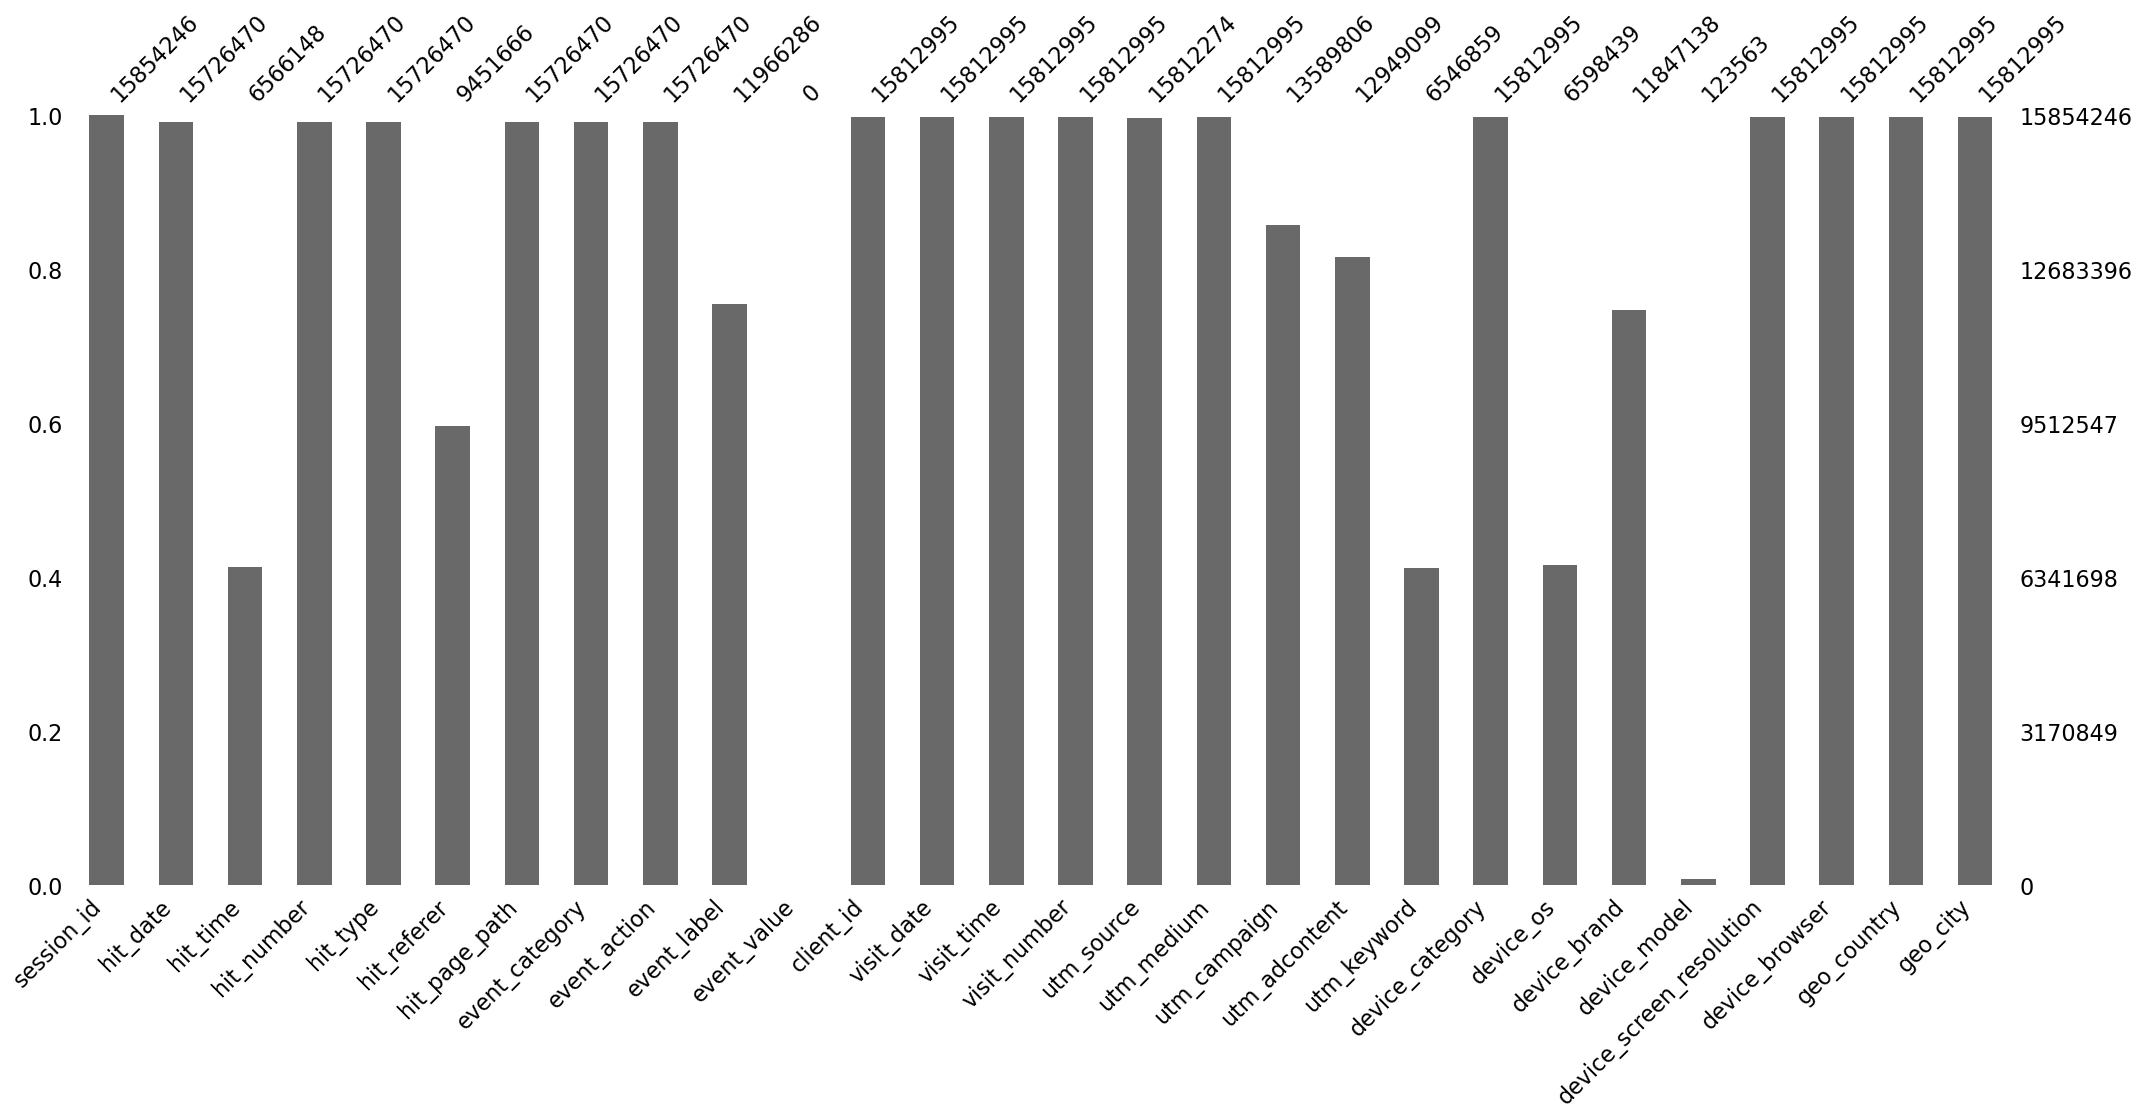

In [16]:
msno.bar(df);

In [17]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                    0.000000
device_browser                0.260189
device_screen_resolution      0.260189
device_category               0.260189
utm_medium                    0.260189
visit_number                  0.260189
geo_country                   0.260189
visit_date                    0.260189
client_id                     0.260189
visit_time                    0.260189
geo_city                      0.260189
utm_source                    0.264737
event_action                  0.805942
event_category                0.805942
hit_page_path                 0.805942
hit_date                      0.805942
hit_type                      0.805942
hit_number                    0.805942
utm_campaign                 14.282862
utm_adcontent                18.324094
event_label                  24.523147
device_brand                 25.274668
hit_referer                  40.384008
device_os                    58.380619
hit_time                     58.584293
utm_keyword              

In [18]:
df_clean = df.copy()

Генерация целевого действия на основании события

In [19]:
df_clean.event_action = df_clean.event_action.fillna('other')
event_action = ['sub_car_claim_click',
                'sub_car_claim_submit_click',
                'sub_open_dialog_click',
                'sub_custom_question_submit_click',
                'sub_call_number_click',
                'sub_callback_submit_click',
                'sub_submit_success',
                'sub_car_request_submit_click',
                0]
event_action_num = []
for elem in df_clean.event_action.tolist():
    for x in event_action:
        if x == 0:
            event_action_num.append(0)
        elif elem == x:
            event_action_num.append(1)
            break
df_clean['event_value'] = pd.to_numeric(pd.Series(event_action_num))

Генерация дополнительных фичей (марка и модель авто)

In [20]:
df_clean['car_brand'] = df_clean['hit_page_path'].str.split('/').str[3]
df_clean = df_clean[df_clean.car_brand.notna()]
car_brand_new = []
for elem in df_clean.car_brand.tolist():
    if len(elem) > 2 & len(elem) <= 13:
        car_brand_new.append(elem)
    else:
        car_brand_new.append('-')
ind = df_clean.index
df_clean['car_brand'] = pd.Series(car_brand_new, index=ind)
df_clean.car_brand = df_clean.car_brand.fillna('-')
df_clean = df_clean[df_clean.car_brand != '-']
df_clean['car_brand']

1                  kia
2           volkswagen
3           volkswagen
4                  kia
8           volkswagen
               ...    
15725994    volkswagen
15726458      lada-vaz
15726464    volkswagen
15726466       renault
15726467           kia
Name: car_brand, Length: 3526737, dtype: object

In [21]:
df_clean['car_model'] = df_clean['hit_page_path'].str.split('/').str[4]
df_clean = df_clean[df_clean.car_model.notna()]
car_model_new = []
for elem in df_clean.car_model.tolist():
    if len(elem) <= 15:
        car_model_new.append(elem)
    else:
        car_model_new.append('-')
ind = df_clean.index
df_clean['car_model'] = pd.Series(car_model_new, index=ind)
df_clean.car_model = df_clean.car_model.fillna('-')
df_clean = df_clean[df_clean.car_model != '-']
df_clean['car_model']

1            seltos
2            tiguan
3            tiguan
4            seltos
8            tiguan
             ...   
15725994    touareg
15726458      vesta
15726464    touareg
15726466      logan
15726467        rio
Name: car_model, Length: 3391424, dtype: object

In [22]:
missing_values = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                   0.000000
car_brand                    0.000000
event_value                  0.000000
event_action                 0.000000
event_category               0.000000
hit_page_path                0.000000
car_model                    0.000000
hit_type                     0.000000
hit_number                   0.000000
hit_date                     0.000000
geo_city                     0.809041
geo_country                  0.809041
device_browser               0.809041
device_screen_resolution     0.809041
device_category              0.809041
utm_medium                   0.809041
visit_number                 0.809041
visit_time                   0.809041
visit_date                   0.809041
client_id                    0.809041
utm_source                   0.822309
utm_campaign                19.867879
hit_time                    23.080275
device_os                   23.889316
utm_keyword                 24.837207
device_brand                26.095086
utm_adconten

In [23]:
df_clean = df_clean.drop(columns=['hit_date',
                                  'hit_time',
                                  'hit_number',
                                  'hit_type',
                                  'hit_page_path',
                                  'event_action',
                                  'event_label',
                                  'client_id',
                                  'visit_date',
                                  'visit_time',
                                  'visit_number',
                                  'device_screen_resolution',
                                  'hit_referer',
                                  'device_os',
                                  'utm_keyword',
                                  'device_model'])

Дополнительная очистка данных

In [24]:
df_clean.utm_source = df_clean.utm_source.fillna('other')
df_clean = df_clean[df_clean.utm_campaign.notna()]
df_clean = df_clean[df_clean.utm_adcontent.notna()]
df_clean = df_clean[df_clean.device_brand.notna()]
df_clean = df_clean[df_clean.utm_medium != '(not set)']
df_clean = df_clean[df_clean.utm_medium.notna()]
df_clean = df_clean[df_clean.geo_city != '(not set)']
df_clean = df_clean[df_clean.geo_city.notna()]
df_clean = df_clean[df_clean.device_brand != '(not set)']
df_clean = df_clean[df_clean.device_brand.notna()]

Анализ заполнения пропусков

In [25]:
df_clean.describe(include = 'all')

,session_id,event_category,event_value,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,car_brand,car_model
count,1716301,1716301,1.716301e+06,1716301,1716301,1716301,1716301,1716301,1716301,1716301,1716301,1716301,1716301,1716301
unique,159818,29,NaN,92,33,135,94,3,96,13,102,960,74,105
top,1104953709461034442.1638732625.1638732625,card_web,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Chrome,Russia,Moscow,skoda,rapid
freq,298,1620434,NaN,1079437,997556,609128,1098162,1699890,675772,956937,1679561,650003,404411,244331
mean,NaN,NaN,1.073879e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.030703e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
missing_values = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id         0.0
event_category     0.0
event_value        0.0
utm_source         0.0
utm_medium         0.0
utm_campaign       0.0
utm_adcontent      0.0
device_category    0.0
device_brand       0.0
device_browser     0.0
geo_country        0.0
geo_city           0.0
car_brand          0.0
car_model          0.0
dtype: float64

Данные по целевому действию

In [27]:
df_clean.event_value.value_counts(dropna=False)

0    1697870
1      18431
Name: event_value, dtype: int64

Визуализация данных

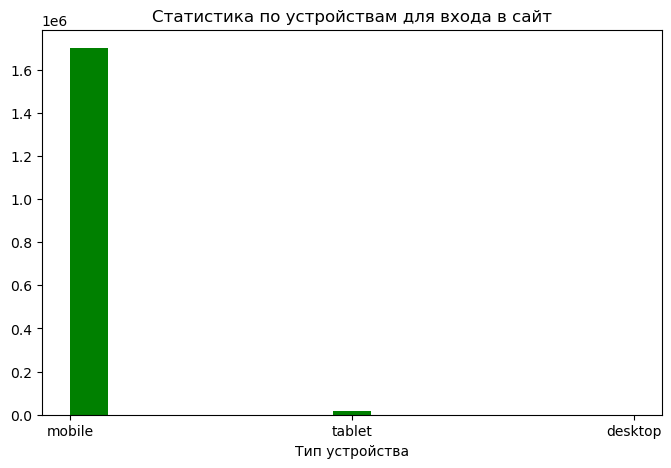

In [28]:
plt.figure(figsize = (8,5))
plt.hist(df_clean.device_category, bins = 15, color = 'green')
plt.xlabel('Тип устройства')
plt.title('Статистика по устройствам для входа в сайт');

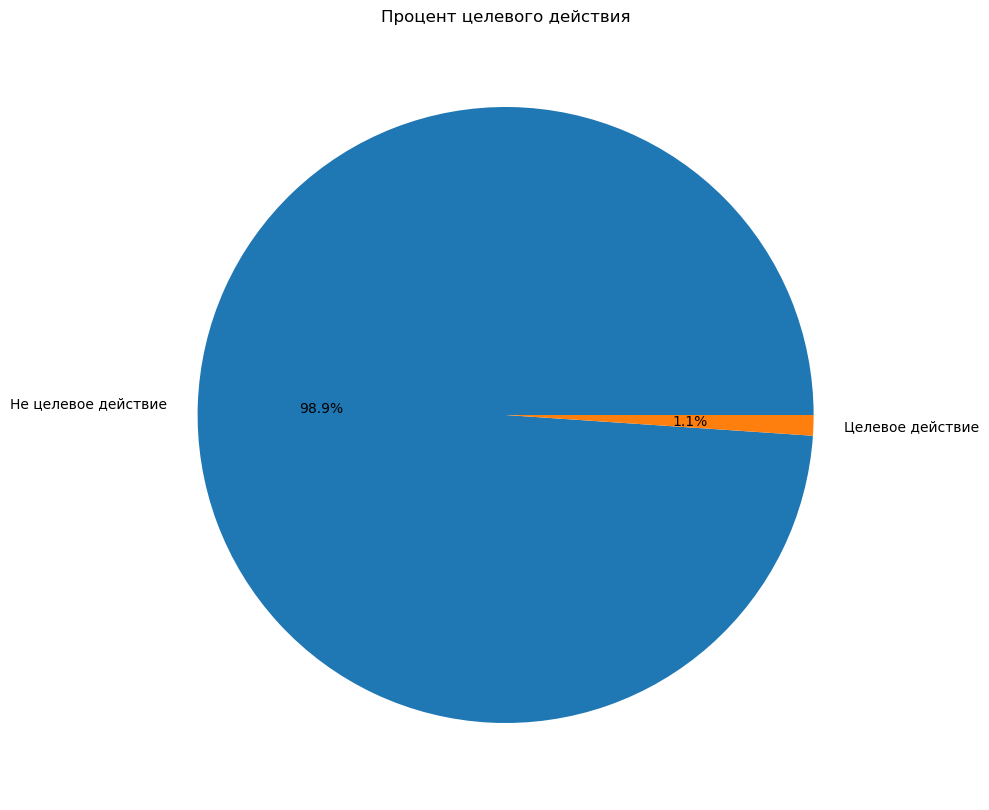

In [29]:
x = df_clean.event_value.sum()
y = df_clean.event_value.count() - x
vals = [y, x]
labels = ["Не целевое действие", "Целевое действие"]

plt.figure(figsize = (10,10))
plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Процент целевого действия")
plt.show()

In [30]:
stats_1 = df_clean.groupby(['utm_campaign'], as_index=False).agg({'event_value': 'sum'})
stats_1 = stats_1.sort_values(by='event_value', ascending=False)
stats_1.head(15)

,utm_campaign,event_value
25,LEoPHuyFvzoNfnzGgfcd,8237
86,gecBYcKZCPMcVYdSSzKP,3677
27,LTuZkdKfxRGVceoWkVyg,2615
116,sbJRYgVfvcnqKJNDDYIr,987
47,SgIUDYUKnyWHVowUOqid,608
133,zxoiLxhuSIFrCeTLQVWZ,390
94,jqlUOdZBNZYfInQVcZlS,296
69,YDIkQmcjRkpdxGbLLtNN,280
51,TmThBvoCcwkCZZUWACYq,253
13,FTjNLDyTrXaWYgZymFkV,209


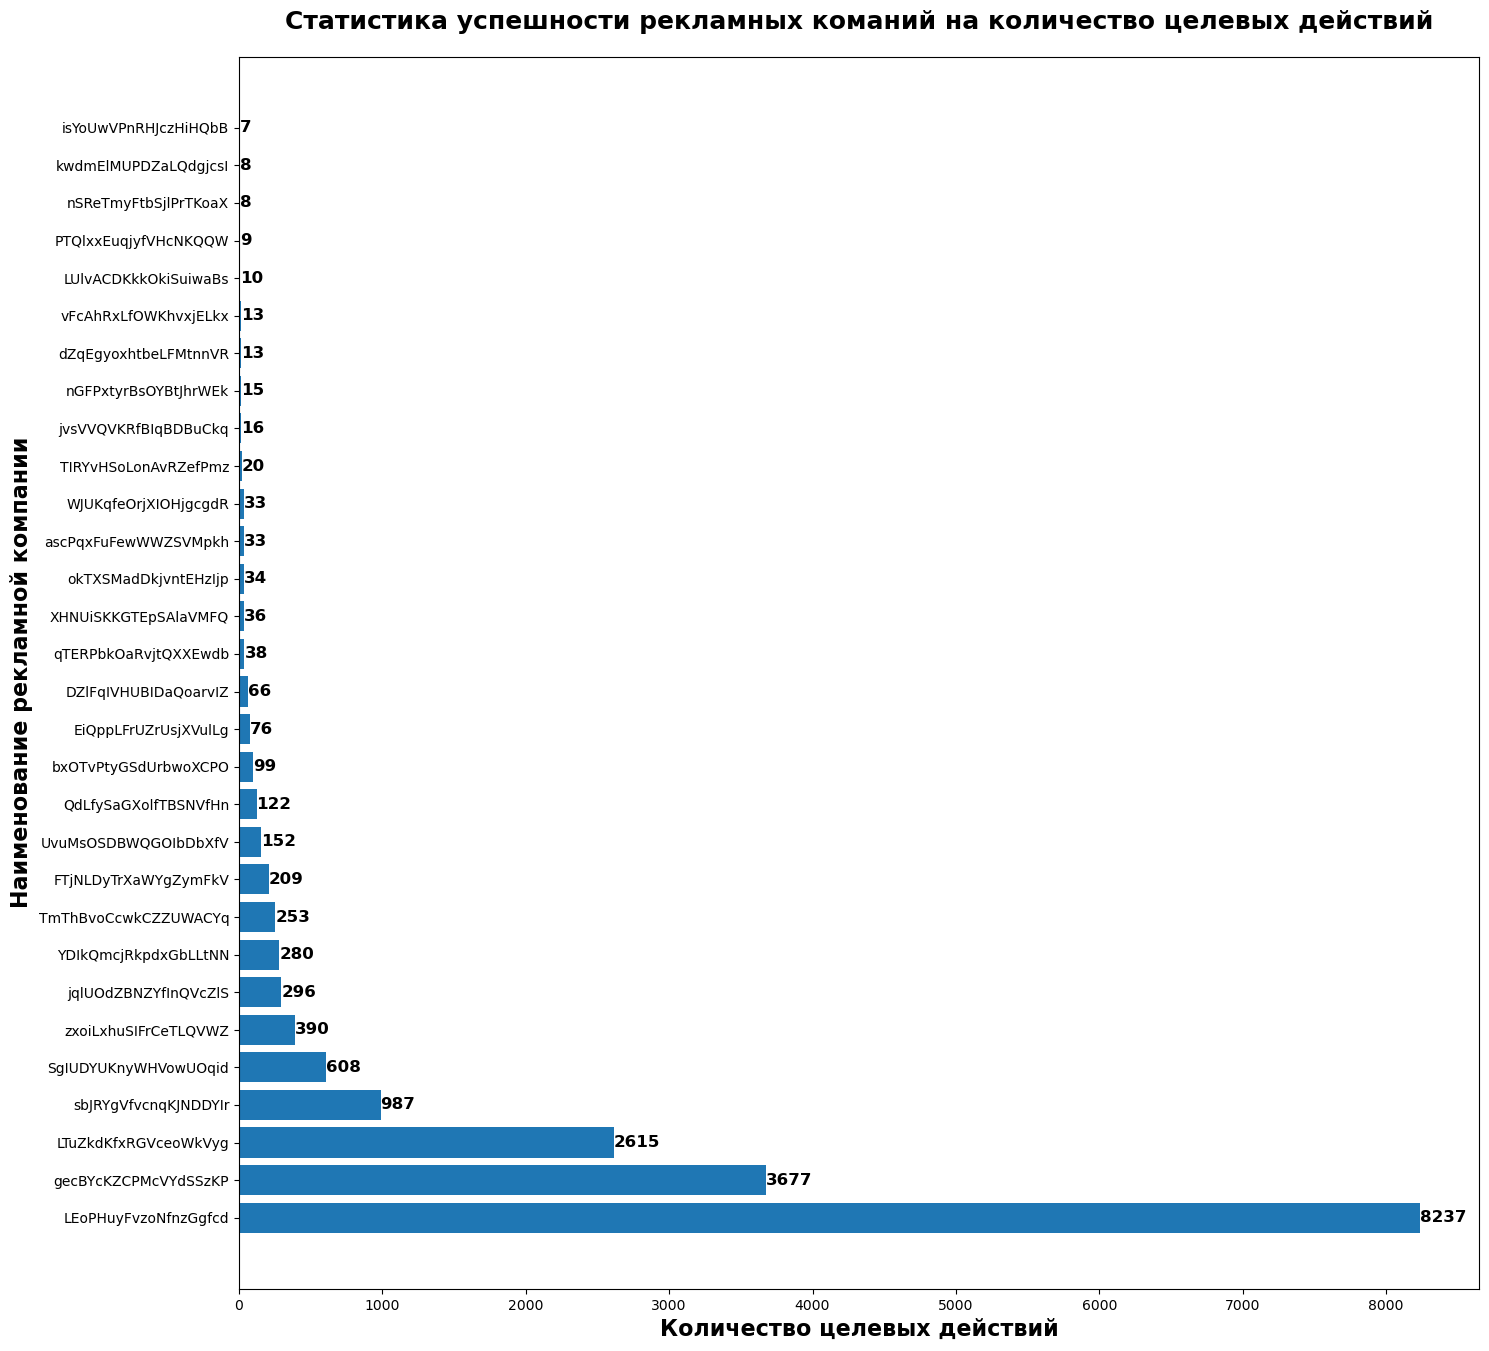

In [31]:
fig, ax = plt.subplots(figsize=(16,16))

bars = plt.barh(stats_1.utm_campaign.head(30), stats_1.event_value.head(30))

ax.bar_label(bars, fontweight='bold', fontsize=12)

plt.ylabel('Наименование рекламной компании', fontsize=16, fontweight='bold')
plt.xlabel('Количество целевых действий', fontsize=16, fontweight='bold')

ax.set_title('Статистика успешности рекламных команий на количество целевых действий',
             fontsize=18, fontweight='bold', pad=20)
plt.show()

In [32]:
stats_2 = df_clean.groupby(['car_brand'], as_index=False).agg({'event_value': 'sum'})
stats_2 = stats_2.sort_values(by='event_value', ascending=False)
stats_2.head()

,car_brand,event_value
56,skoda,4876
33,lada-vaz,3362
67,volkswagen,3016
31,kia,1801
38,mercedes-benz,1245


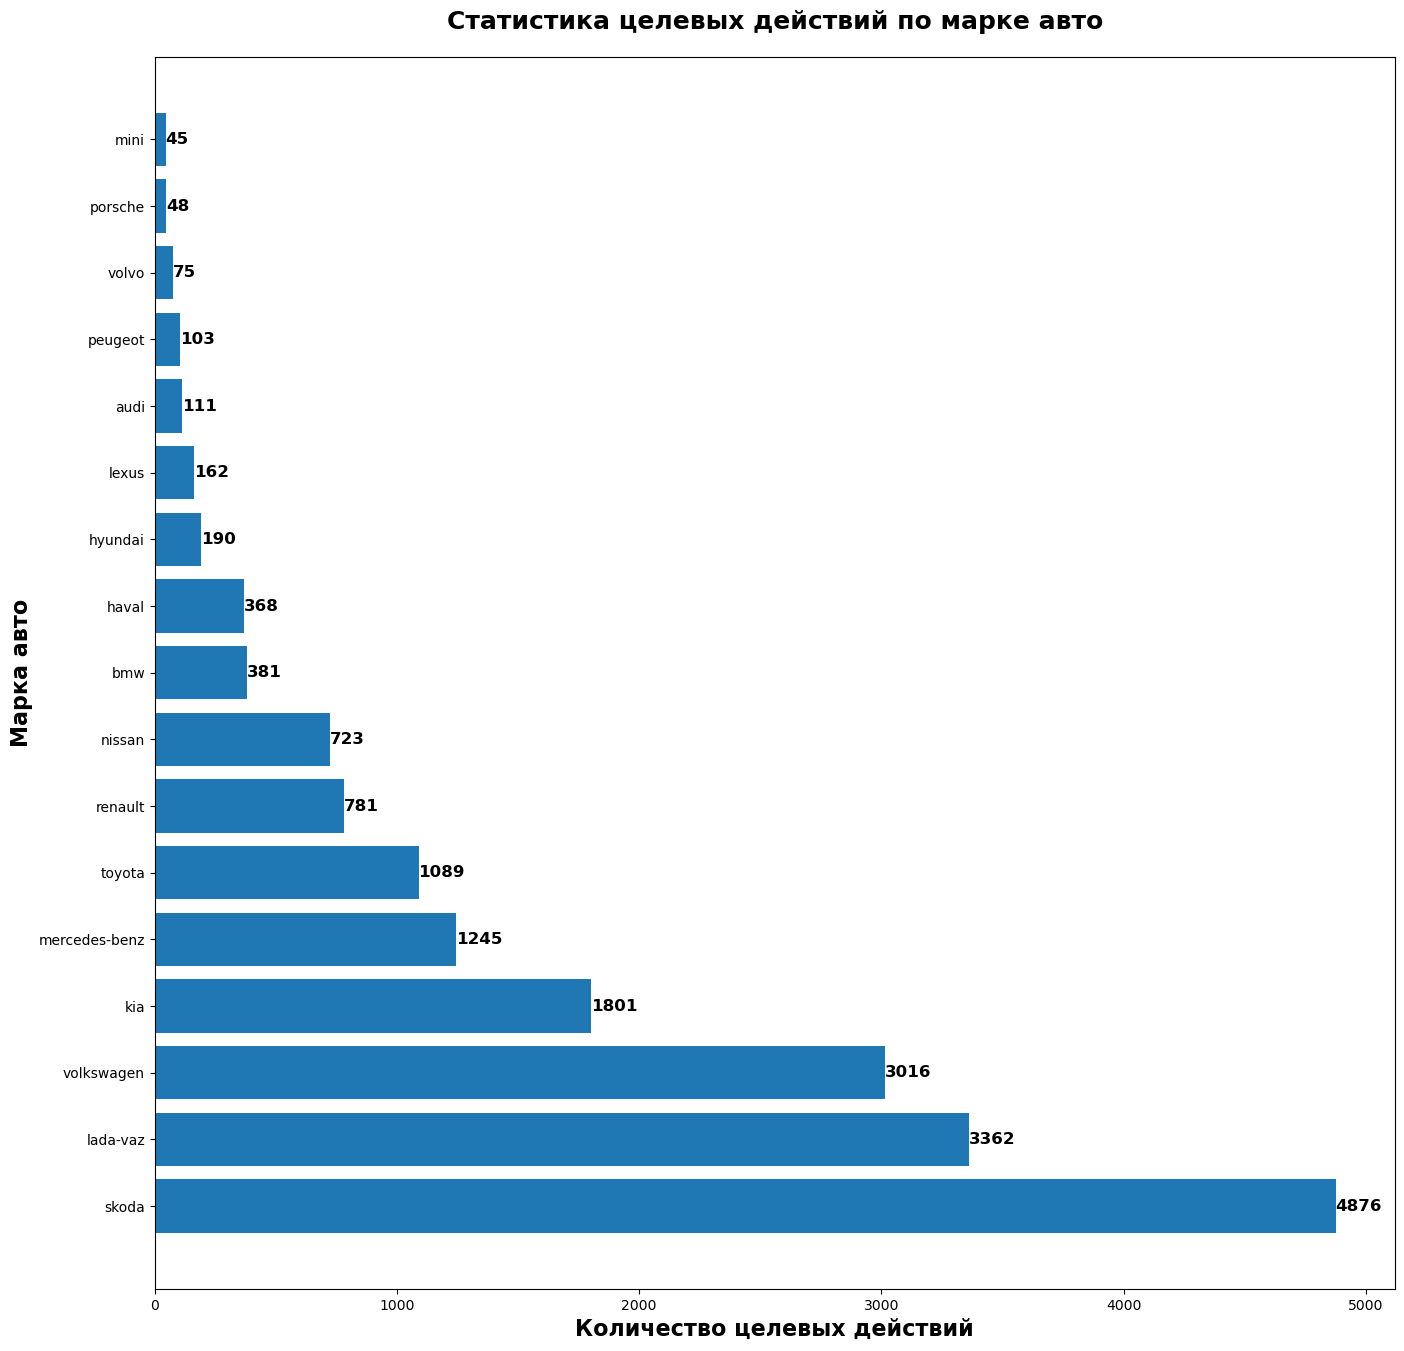

In [33]:
fig, ax = plt.subplots(figsize=(16,16))

bars = plt.barh(stats_2.car_brand.head(17), stats_2.event_value.head(17))

ax.bar_label(bars, fontweight='bold', fontsize=12)

plt.ylabel('Марка авто', fontsize=16, fontweight='bold')
plt.xlabel('Количество целевых действий', fontsize=16, fontweight='bold')

ax.set_title('Статистика целевых действий по марке авто',
             fontsize=18, fontweight='bold', pad=20)
plt.show()

In [34]:
stats_3 = df_clean.groupby(['geo_city'], as_index=False).agg({'event_value': 'sum'})
stats_3 = stats_3.sort_values(by='event_value', ascending=False)
stats_3.head()

,geo_city,event_value
511,Moscow,6705
705,Saint Petersburg,2227
400,Krasnodar,830
344,Kazan,631
929,Yekaterinburg,492


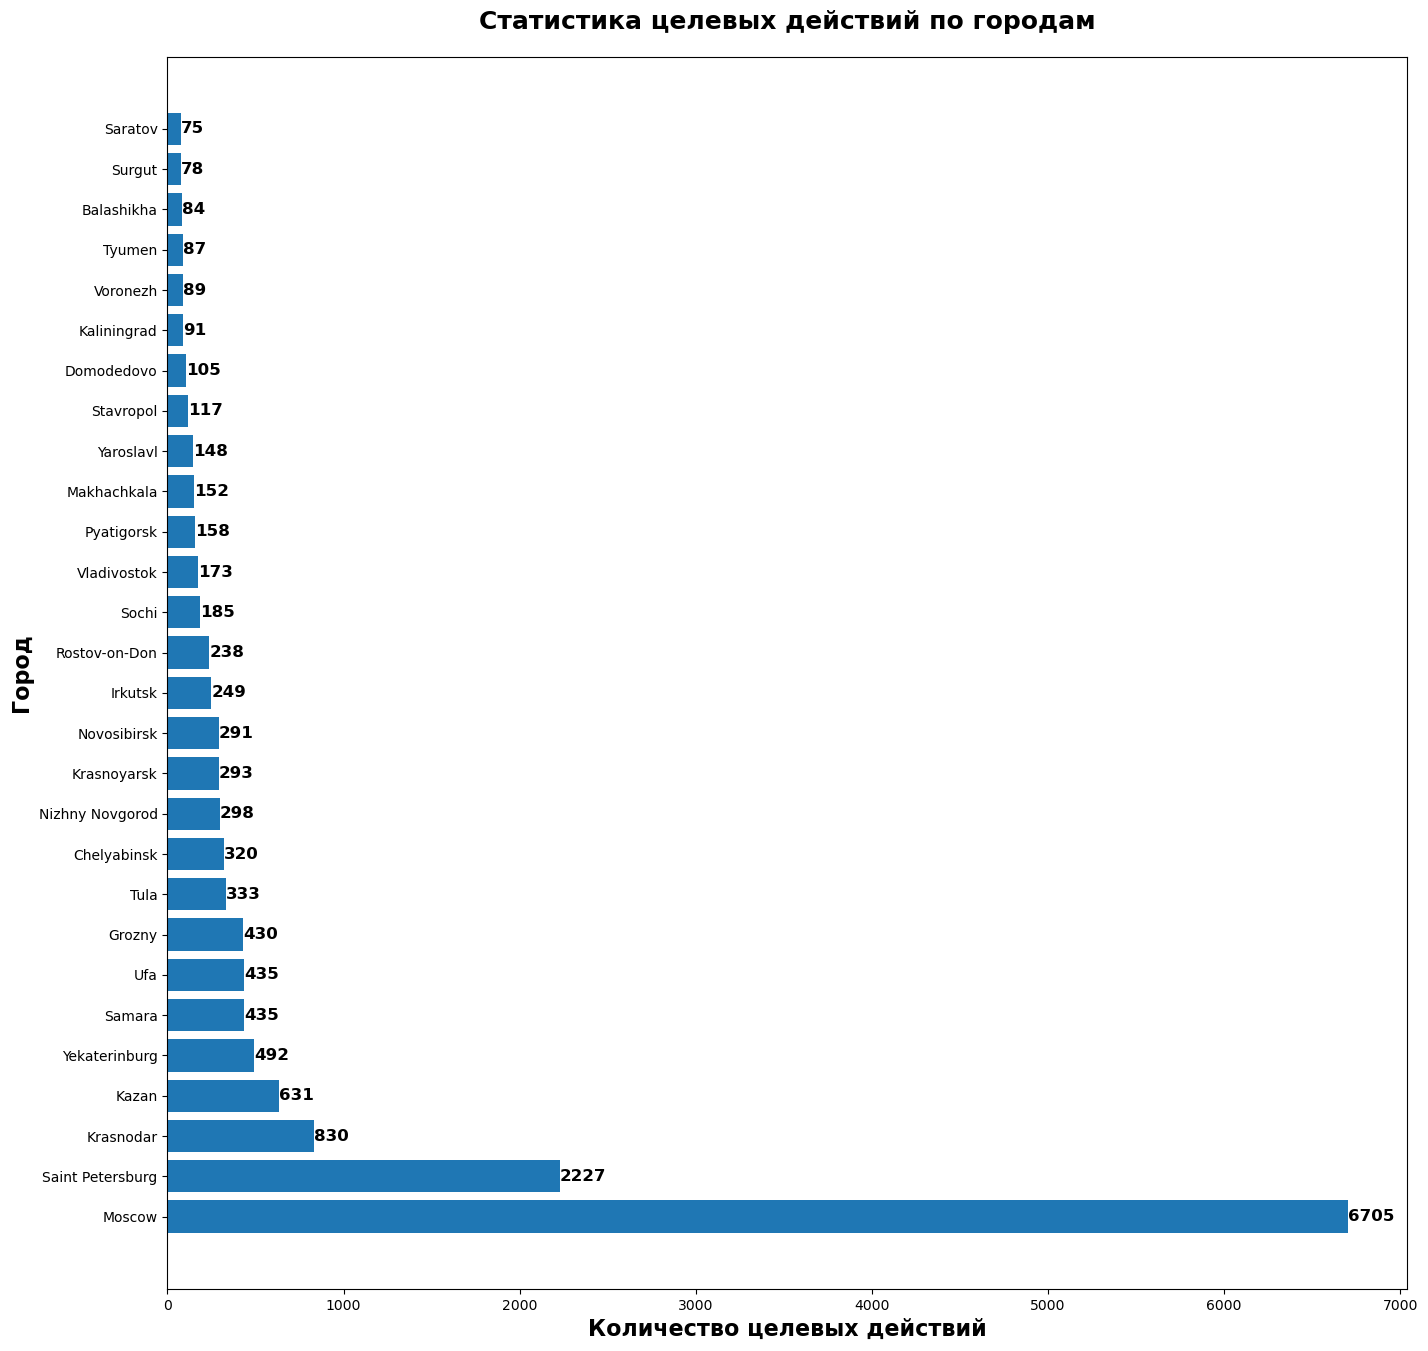

In [35]:
fig, ax = plt.subplots(figsize=(16,16))

bars = plt.barh(stats_3.geo_city.head(28), stats_3.event_value.head(28))

ax.bar_label(bars, fontweight='bold', fontsize=12)

plt.ylabel('Город', fontsize=16, fontweight='bold')
plt.xlabel('Количество целевых действий', fontsize=16, fontweight='bold')

ax.set_title('Статистика целевых действий по городам',
             fontsize=18, fontweight='bold', pad=20)
plt.show()

## 3. Преобразование категориальных переменных

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716301 entries, 283 to 15726466
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   session_id       object
 1   event_category   object
 2   event_value      int64 
 3   utm_source       object
 4   utm_medium       object
 5   utm_campaign     object
 6   utm_adcontent    object
 7   device_category  object
 8   device_brand     object
 9   device_browser   object
 10  geo_country      object
 11  geo_city         object
 12  car_brand        object
 13  car_model        object
dtypes: int64(1), object(13)
memory usage: 196.4+ MB


In [37]:
df_clean = df_clean.drop(columns=['session_id'])

Для обучения модели используем 10% всего DataFrame

In [38]:
df_clean = df_clean.sample(frac=0.1)

In [39]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_clean[['event_category',
                  'utm_source',
                  'utm_medium',
                  'utm_campaign',
                  'utm_adcontent',
                  'device_category',
                  'device_brand',
                  'device_browser',
                  'geo_country',
                  'geo_city',
                  'car_brand',
                  'car_model']])
ohe_cv = ohe.transform(df_clean[['event_category',
                  'utm_source',
                  'utm_medium',
                  'utm_campaign',
                  'utm_adcontent',
                  'device_category',
                  'device_brand',
                  'device_browser',
                  'geo_country',
                  'geo_city',
                  'car_brand',
                  'car_model']]).astype('float16')
df_clean[ohe.get_feature_names_out()] = ohe_cv

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[ohe.get_feature_names_out()] = ohe_cv
C:\Users\SystemX\AppData\Local\Temp\ipykernel_7728\2245900510.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [40]:
df_clean_converted = df_clean.drop(columns=['event_category',
                                  'utm_source',
                                  'utm_medium',
                                  'utm_campaign',
                                  'utm_adcontent',
                                  'device_category',
                                  'device_brand',
                                  'device_browser',
                                  'geo_country',
                                  'geo_city',
                                  'car_brand',
                                  'car_model'])

In [41]:
df_clean_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171630 entries, 2798606 to 15130881
Columns: 1480 entries, event_value to car_model_x7
dtypes: float16(1479), int64(1)
memory usage: 486.8 MB


In [42]:
df_clean_converted.to_csv('data/ga_clean_converted.csv', index=False)

## 4. Обучение моделей

### 4.1. Формирование датасета для обучения

In [43]:
df_total = pd.read_csv('data/ga_clean_converted.csv')

In [45]:
x = df_clean_converted.drop(['event_value'], axis = 1)
y = df_clean_converted['event_value']

In [46]:
print(df_total.shape)
df_total.head()

(171630, 1480)


,event_value,event_category_active_invitation,event_category_ad_banner,event_category_add_ad,event_category_add_ad_vin,event_category_auth,event_category_card_web,event_category_cars,event_category_category_tile,event_category_chat,...,car_model_v-klasse,car_model_vesta,car_model_wb7cowsw,car_model_woxq6mlaac5,car_model_x-trail,car_model_x3,car_model_x3-m,car_model_x5,car_model_x6,car_model_x7
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
x = df_total.drop(['event_value'], axis = 1)
y = df_total['event_value']

### 4.2. Разделение данных на тренировочные и тестовые

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 4.3. Обучение трех моделей

*Случайный лес*

In [49]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
predict_train_rf = rf_clf.predict(x_train)
predict_test_rf = rf_clf.predict(x_test)
print(accuracy_score(y_train, predict_train_rf))
print(accuracy_score(y_test, predict_test_rf))

0.9997669405115656
0.9973975023791489


In [51]:
confusion_matrix(y_test, predict_test_rf)

array([[50903,    49],
       [   85,   452]], dtype=int64)

In [52]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

*Тюнинг - Случайный лес*

In [53]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=50)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [54]:
predict_train_rf = rf_clf.predict(x_train)
predict_test_rf = rf_clf.predict(x_test)
print(accuracy_score(y_train, predict_train_rf))
print(accuracy_score(y_test, predict_test_rf))

0.9997669405115656
0.99749461049933


In [55]:
confusion_matrix(y_test, predict_test_rf)

array([[50906,    46],
       [   83,   454]], dtype=int64)

*Логистическая регрессия*

In [56]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [57]:
predict_train_logreg = logreg.predict(x_train)
predict_test_logreg = logreg.predict(x_test)
print(accuracy_score(y_train, predict_train_logreg))
print(accuracy_score(y_test, predict_test_logreg))

0.998859673217303
0.9982326322127056


In [58]:
confusion_matrix(y_test, predict_test_logreg)

array([[50881,    71],
       [   20,   517]], dtype=int64)

In [59]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

*Тюнинг - Логистическая регрессия*

In [60]:
logreg = LogisticRegression(random_state=42, penalty='l1', solver='saga')
logreg.fit(x_train, y_train)

C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [61]:
predict_train_logreg = logreg.predict(x_train)
predict_test_logreg = logreg.predict(x_test)
print(accuracy_score(y_train, predict_train_logreg))
print(accuracy_score(y_test, predict_test_logreg))

0.9987181728136106
0.9981743673405971


In [62]:
confusion_matrix(y_test, predict_test_logreg)

array([[50882,    70],
       [   24,   513]], dtype=int64)

*Многослойный персептрон*

In [63]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [64]:
predict_train_mlp = mlp.predict(x_train)
predict_test_mlp = mlp.predict(x_test)
print(accuracy_score(y_train, predict_train_mlp))
print(accuracy_score(y_test, predict_test_mlp))

0.9996920285331402
0.9980189943483074


In [65]:
confusion_matrix(y_test, predict_test_mlp)

array([[50890,    62],
       [   40,   497]], dtype=int64)

In [66]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

*Тюнинг - Многослойный персептрон*

In [67]:
mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,20), activation='tanh')
mlp.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20), max_iter=500,
              random_state=42)

In [68]:
predict_train_mlp = mlp.predict(x_train)
predict_test_mlp = mlp.predict(x_test)
print(accuracy_score(y_train, predict_train_mlp))
print(accuracy_score(y_test, predict_test_mlp))

0.9994672925978642
0.998077259220416


In [69]:
confusion_matrix(y_test, predict_test_mlp)

array([[50886,    66],
       [   33,   504]], dtype=int64)

### 4.4. Тюнинг параметров и выбор лучшей модели

In [70]:
print('Случайный лес (train) - ', accuracy_score(y_train, predict_train_rf))
print('Случайный лес (test) - ', accuracy_score(y_test, predict_test_rf))

print('Логистическая регрессия (train) - ', accuracy_score(y_train, predict_train_logreg))
print('Логистическая регрессия (test) - ', accuracy_score(y_test, predict_test_logreg))

print('Многослойный персептрон (train) - ', accuracy_score(y_train, predict_train_mlp))
print('Многослойный персептрон (test) - ', accuracy_score(y_test, predict_test_mlp))

Случайный лес (train) -  0.9997669405115656
Случайный лес (test) -  0.99749461049933
Логистическая регрессия (train) -  0.9987181728136106
Логистическая регрессия (test) -  0.9981743673405971
Многослойный персептрон (train) -  0.9994672925978642
Многослойный персептрон (test) -  0.998077259220416


In [71]:
cross_validate(rf_clf, x, y, cv=5)

{'fit_time': array([19.47020888, 18.74720049, 18.60619879, 21.17322683, 19.07720542]),
 'score_time': array([0.32300305, 0.32300353, 0.31700349, 0.35300303, 0.32700276]),
 'test_score': array([0.99772767, 0.9979316 , 0.99796073, 0.99787333, 0.99761114])}

In [72]:
cross_validate(logreg, x, y, cv=5)

C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'fit_time': array([180.40893197, 178.93691492, 179.62707949, 183.27501535,
        183.47578025]),
 'score_time': array([0.08500075, 0.08900094, 0.08700061, 0.08400083, 0.08399987]),
 'test_score': array([0.99836858, 0.99860164, 0.99845598, 0.99842685, 0.9979316 ])}

In [73]:
cross_validate(mlp, x, y, cv=5)

{'fit_time': array([282.30443478, 342.36663055, 408.61862874, 349.53297305,
        362.45034051]),
 'score_time': array([0.1449883 , 0.13300037, 0.15300179, 0.15499973, 0.13299942]),
 'test_score': array([0.99804813, 0.99807726, 0.99810639, 0.99772767, 0.99743635])}

Лучшая модель - Логистическая регрессия:

* лучшее время на оценку модели
* лучшее значение метрики на тестовом фолде

### 4.5. Подсчет значений метрики на тестовой выборке

In [74]:
cv_score_logreg = cross_val_score(logreg, x, y, cv=5)
cv_score_logreg.mean(), cv_score_logreg.std()

C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.9983569306065373, 0.0002261097466868685)

*ROC-AUC*

LogisticRegression: ROC-AUC=0.977


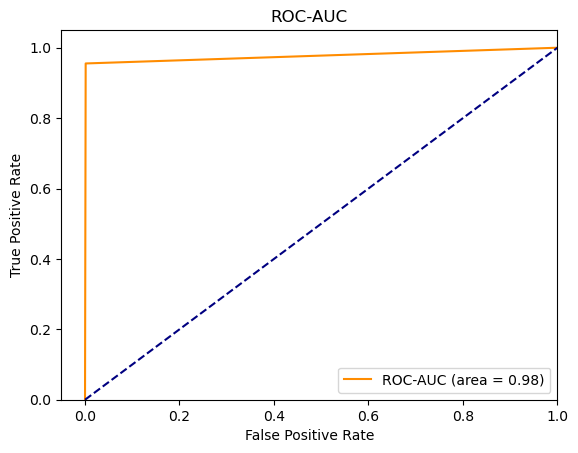

In [78]:
# рассчитываем ROC-AUC
fpr, tpr, treshold = roc_curve(y_test, predict_test_logreg)
logreg_auc = roc_auc_score(y_test, predict_test_logreg)
print('LogisticRegression: ROC-AUC=%.3f' % (logreg_auc))
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-AUC (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

## 5. Результат

### 5.1. Обучение модели на всём датасете

In [79]:
logreg = LogisticRegression(random_state=42, penalty='l1', solver='saga')
logreg.fit(x_train, y_train)

C:\Users\SystemX\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='saga')

### 5.2. Сохранение обученной модели в `pickle`

In [80]:
filename = 'model_logreg.pickle'

with open(filename, 'wb') as file:
    pickle.dump(logreg, file)

## Проверка

In [81]:
with open(filename, 'rb') as file:
    model_from_pickle = pickle.load(file)

In [99]:
row = df_total.sample(1)
row

,event_value,event_category_active_invitation,event_category_ad_banner,event_category_add_ad,event_category_add_ad_vin,event_category_auth,event_category_card_web,event_category_cars,event_category_category_tile,event_category_chat,...,car_model_v-klasse,car_model_vesta,car_model_wb7cowsw,car_model_woxq6mlaac5,car_model_x-trail,car_model_x3,car_model_x3-m,car_model_x5,car_model_x6,car_model_x7
30265,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
row_x = row.drop(['event_value'], axis = 1)
row_y = row['event_value']

In [101]:
model_from_pickle.predict(row_x)

array([0], dtype=int64)

In [102]:
row_y

30265    0
Name: event_value, dtype: int64